<a href="https://colab.research.google.com/github/pachterlab/BMGP_2020/blob/main/analysis/notebooks/clicktag/clicktag_preprocess_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!date

Tue 07 Mar 2023 11:21:50 AM UTC


# Install packages and download data

In [2]:
import sys
COLAB = "google.colab" in sys.modules


In [3]:
if COLAB:
    !git clone https://github.com/sbooeshaghi/BMGP_2020.git

Cloning into 'BMGP_2020'...
remote: Enumerating objects: 1154, done.
remote: Counting objects: 100% (337/337), done.
remote: Compressing objects: 100% (221/221), done.
remote: Total 1154 (delta 146), reused 256 (delta 114), pack-reused 817
Receiving objects: 100% (1154/1154), 496.73 MiB | 22.70 MiB/s, done.
Resolving deltas: 100% (470/470), done.
Updating files: 100% (154/154), done.


In [4]:
if COLAB:
    !pip install --quiet \
    kb-python==0.26.3 \
    anndata==0.7.6

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 15.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 72.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 MB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.5/63.5 KB 7.5 MB/s eta 0:00:00


In [5]:
if COLAB:
    # download the relevant data
    !wget -O clicktag_fastqs.tar.gz \
    -q --show-progress --progress=bar:force  \
    https://caltech.box.com/shared/static/zqaom7yuul7ujetqyhnd4lvf8vhzqsyg.gz \
    2>&1
    !tar -xf clicktag_fastqs.tar.gz

clicktag_fastqs.tar 100%[===================>]   1.47G  16.3MB/s    in 2m 15s  


# Preprocess with kb

## Generate pseudoalignment index

In [6]:
%%time
!INDEX="BMGP_2020/references/clicktag/kite/features.idx" && \
F2B="BMGP_2020/references/clicktag/kite/f2b.txt" && \
FASTA="BMGP_2020/references/clicktag/kite/features.fa" && \
FB="BMGP_2020/references/clicktag/kite/feature_barcodes.txt" && \
kb ref \
-i $INDEX \
-g $F2B \
-f1 $FASTA \
--workflow kite \
$FB

[2023-03-07 11:36:05,991]    INFO [ref_kite] Generating mismatch FASTA at BMGP_2020/references/clicktag/kite/features.fa
[2023-03-07 11:36:06,030]    INFO [ref_kite] Creating transcript-to-gene mapping at BMGP_2020/references/clicktag/kite/f2b.txt
[2023-03-07 11:36:06,040]    INFO [ref_kite] Skipping kallisto index because BMGP_2020/references/clicktag/kite/features.idx already exists. Use the --overwrite flag to overwrite.
CPU times: user 55.1 ms, sys: 14.9 ms, total: 70 ms
Wall time: 4.14 s


## Pseudoalign reads

In [8]:
%%bash
FB="BMGP_2020/references/clicktag/kite/feature_barcodes.txt" && \
INDEX="BMGP_2020/references/clicktag/kite/features.idx" && \
F2B="BMGP_2020/references/clicktag/kite/f2b.txt" && \
FASTA="BMGP_2020/references/clicktag/kite/features.fa" && \
OUT="kite_out" && \
FASTQS=$(FASTQDIR="fastqs/" && paste -d" " \
<(ls $FASTQDIR | awk -v p=$FASTQDIR '{print p$0}' | grep R1) \
<(ls $FASTQDIR | awk -v p=$FASTQDIR '{print p$0}' | grep R2)) && \
kb count \
-i $INDEX \
-g $F2B \
-x 10xv2 \
-o $OUT \
--workflow kite \
--h5ad \
--filter bustools \
--overwrite \
$FASTQS

[2023-03-07 11:37:34,593]    INFO [count] Using index BMGP_2020/references/clicktag/kite/features.idx to generate BUS file to kite_out from
[2023-03-07 11:37:34,594]    INFO [count]         fastqs/NSC_Fixed_S2_L001_R1_001.fastq.gz
[2023-03-07 11:37:34,594]    INFO [count]         fastqs/NSC_Fixed_S2_L001_R2_001.fastq.gz
[2023-03-07 11:39:54,495]    INFO [count] Sorting BUS file kite_out/output.bus to kite_out/tmp/output.s.bus
[2023-03-07 11:40:17,691]    INFO [count] Whitelist not provided
[2023-03-07 11:40:17,691]    INFO [count] Copying pre-packaged 10XV2 whitelist to kite_out
[2023-03-07 11:40:17,928]    INFO [count] Inspecting BUS file kite_out/tmp/output.s.bus
[2023-03-07 11:40:25,588]    INFO [count] Correcting BUS records in kite_out/tmp/output.s.bus to kite_out/tmp/output.s.c.bus with whitelist kite_out/10x_version2_whitelist.txt
[2023-03-07 11:40:34,033]    INFO [count] Sorting BUS file kite_out/tmp/output.s.c.bus to kite_out/output.unfiltered.bus
[2023-03-07 11:40:49,543]    

In [9]:
!cat kite_out/run_info.json

{
	"n_targets": 0,
	"n_bootstraps": 0,
	"n_processed": 15928888,
	"n_pseudoaligned": 15357069,
	"n_unique": 15357069,
	"p_pseudoaligned": 96.4,
	"p_unique": 96.4,
	"kallisto_version": "0.46.2",
	"index_version": 0,
	"start_time": "Tue Mar  7 11:37:34 2023",
	"call": "/usr/local/lib/python3.8/dist-packages/kb_python/bins/linux/kallisto/kallisto bus -i BMGP_2020/references/clicktag/kite/features.idx -o kite_out -x 10xv2 -t 8 fastqs/NSC_Fixed_S2_L001_R1_001.fastq.gz fastqs/NSC_Fixed_S2_L001_R2_001.fastq.gz"
}


In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import anndata

fsize = 15


def nd(arr):
    return np.asarray(arr).reshape(-1)


def yex(ax):
    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, "white", alpha=0.75, zorder=0)
    ax.set(**{"aspect": "equal", "xlim": lims, "ylim": lims})
    return ax


plt.rcParams.update({"font.size": fsize})
%config InlineBackend.figure_format = 'retina'

In [14]:
adata = anndata.read_h5ad("/content/kite_out/counts_unfiltered/adata.h5ad")

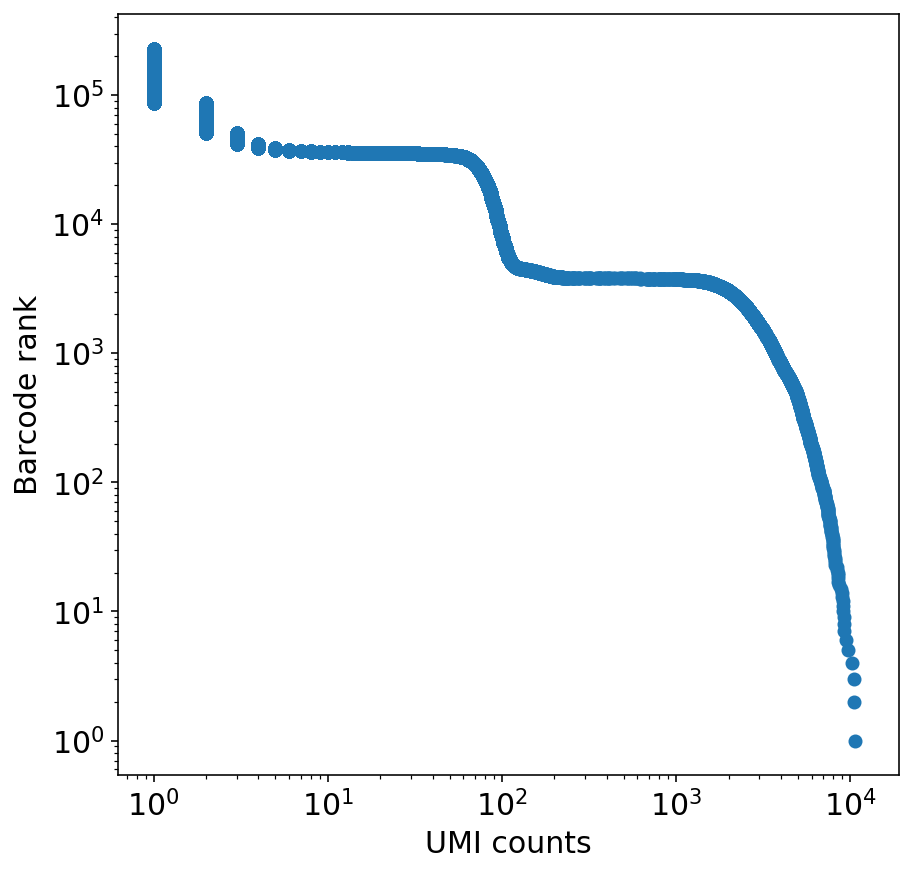

In [15]:
fig, ax = plt.subplots(figsize=(7,7))

x = np.sort(nd(adata.X.sum(1)))[::-1]
y = np.arange(x.shape[0])

ax.scatter(x,y)

ax.set(**{
    "xlabel": "UMI counts",
    "ylabel": "Barcode rank",
    "xscale": "log",
    "yscale": "log"
})

fig.show()